# Covid 19 Analysis

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sb
import pandas as pd
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

### 3) Prediction and Regression
#### 3.1) Random Forest
- - -

In [2]:
# load previously processed information into dataframe
df = pd.read_csv('data/covid_19_world_processed.csv', delimiter=',')
df

,Country/Region,Lat,Lat_norm,Long,Long_norm,Date,Num_days_from_begin,Num_days_from_begin_norm,Confirmed,Deaths,Recovered,Confirmed_inc,Confirmed_inc_norm,Deaths_inc,Deaths_inc_norm,Recovered_inc,Recovered_inc_norm
0,Afghanistan,33.0000,0.471083,65.0000,0.597360,2020-01-22,0,-1.717183,0,0,0.0,0.0,-0.117725,0.0,-0.110666,0.0,-0.121130
1,Albania,41.1533,0.798304,20.1683,-0.039787,2020-01-22,0,-1.717183,0,0,0.0,0.0,-0.117725,0.0,-0.110666,0.0,-0.121130
2,Alberta (Canada),53.9333,1.311212,-116.5765,-1.983201,2020-01-22,0,-1.717183,0,0,NaN,0.0,-0.117725,0.0,-0.110666,NaN,NaN
3,Algeria,28.0339,0.271776,1.6596,-0.302833,2020-01-22,0,-1.717183,0,0,0.0,0.0,-0.117725,0.0,-0.110666,0.0,-0.121130
4,Andorra,42.5063,0.852605,1.5218,-0.304791,2020-01-22,0,-1.717183,0,0,0.0,0.0,-0.117725,0.0,-0.110666,0.0,-0.121130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30619,Yukon (Canada),64.2823,1.726554,-135.0000,-2.245035,2020-05-16,115,1.717183,11,0,NaN,0.0,-0.117725,0.0,-0.110666,NaN,NaN
30620,Yunnan (China),24.9740,0.148971,101.4870,1.115912,2020-05-16,115,1.717183,185,2,183.0,0.0,-0.117725,0.0,-0.110666,0.0,-0.121130
30621,Zambia,-15.4167,-1.472053,28.2833,0.075543,2020-05-16,115,1.717183,679,7,183.0,25.0,-0.098276,0.0,-0.110666,59.0,0.003578
30622,Zhejiang (China),29.1832,0.317901,120.0934,1.380346,2020-05-16,115,1.717183,1268,1,1267.0,0.0,-0.117725,0.0,-0.110666,0.0,-0.121130


In [3]:
# get the inputs of the data for the machine learning algorithm
inputs = df[["Lat_norm", "Long_norm", "Num_days_from_begin_norm"]].values
inputs

array([[ 0.47108303,  0.59735963, -1.71718314],
       [ 0.79830423, -0.03978737, -1.71718314],
       [ 1.3112115 , -1.98320106, -1.71718314],
       ...,
       [-1.47205293,  0.07554281,  1.71718314],
       [ 0.31790115,  1.38034566,  1.71718314],
       [-1.65599721,  0.09994051,  1.71718314]])

#### 3.1.1) Regression for Confirmed Cases
- - -

In [4]:
# get the output for the machine learning algorithm (confirmed cases)
outputs = df["Confirmed"].values
outputs

array([   0,    0,    0, ...,  679, 1268,   42])

In [5]:
# split the data into training and testing sets
in_conf_train, in_conf_test, out_conf_train, out_conf_test = train_test_split(inputs, outputs, test_size=0.25, shuffle=True)

# NOTE: actually, the "testing" set will be used for "manual" testing and plotting, while the training set will be
# further divided in training and testing sets, in order to perform k-fold cross validation.

In [6]:
# create Random Forest Regressor instance, and check the hyper parameters
rf = RandomForestRegressor()
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [7]:
# do hyper parameter tuning with the Random Forest, using cross validation
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

# search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
search = RandomizedSearchCV(rf, param_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=30, verbose=1)

search.fit(in_conf_train, out_conf_train)
print('Best score: {}'.format(search.best_score_))
print('Best parameters: {}'.format(search.best_params_))
search.best_estimator_
rf_estimator = search.best_estimator_
# rf_estimator = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      # max_depth=100, max_features=3, max_leaf_nodes=None,
                      # max_samples=None, min_impurity_decrease=0.0,
                      # min_impurity_split=None, min_samples_leaf=3,
                      # min_samples_split=8, min_weight_fraction_leaf=0.0,
                      # n_estimators=100, n_jobs=None, oob_score=False,
                      # random_state=None, verbose=0, warm_start=False)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  6.8min finished


Best score: -22378811.94064403
Best parameters: {'n_estimators': 300, 'min_samples_split': 8, 'min_samples_leaf': 3, 'max_features': 2, 'max_depth': 90, 'bootstrap': True}


MAE: 273.6756173389962
MSE: 5855114.819522048


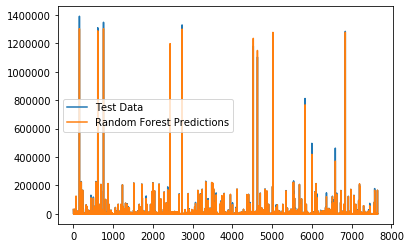

In [18]:
rf_estimator_pred = rf_estimator.predict(in_conf_test)
plt.plot(out_conf_test)
plt.plot(rf_estimator_pred)
plt.legend(['Test Data', 'Random Forest Predictions'])
print('MAE:', mean_absolute_error(out_conf_test, rf_estimator_pred))
print('MSE:',mean_squared_error(out_conf_test, rf_estimator_pred))

(array([ 1.,  2.,  5.,  6.,  9., 13., 31., 53., 57., 23.]),
 array([0.98755225, 0.98863781, 0.98972336, 0.99080891, 0.99189446,
        0.99298001, 0.99406557, 0.99515112, 0.99623667, 0.99732222,
        0.99840777]),
 <a list of 10 Patch objects>)

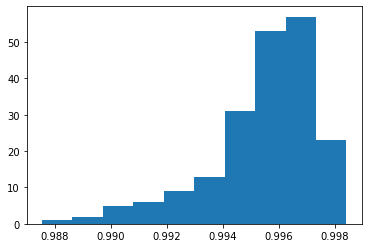

In [10]:
model_accuracies = []

# range estava a 1000
for repetition in range(200):
    (accuracy_in_train,
     accuracy_in_test,
     accuracy_out_train,
     accuracy_out_test) = train_test_split(inputs, outputs, test_size=0.25, shuffle=True)
    
    rfr = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=100, max_features=3, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=3,
                      min_samples_split=8, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
    rfr.fit(accuracy_in_train, accuracy_out_train)
    classifier_accuracy = rfr.score(accuracy_in_test, accuracy_out_test)
    model_accuracies.append(classifier_accuracy)
    
plt.hist(model_accuracies)

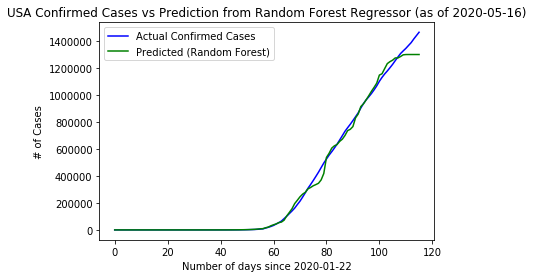

In [11]:
usa_df = df.loc[df["Country/Region"] == "US"]
usa_inputs = usa_df[["Lat_norm", "Long_norm", "Num_days_from_begin_norm"]].values
usa_outputs = usa_df["Confirmed"].values
days_list = df["Num_days_from_begin"].unique()
usa_pred_output = rf_estimator.predict(usa_inputs) 

first_day = df["Date"].min()
last_day = df["Date"].max()
plt.plot(days_list, usa_outputs, color='blue', label="Actual Confirmed Cases")
plt.plot(days_list, usa_pred_output, color='green', label="Predicted (Random Forest)")
plt.xlabel("Number of days since {}".format(first_day))
plt.ylabel("# of Cases")
plt.title("USA Confirmed Cases vs Prediction from Random Forest Regressor (as of {})".format(last_day))
plt.legend()

In [12]:
# do model with non normalized values, for comparison
inputs_non_norm = df[["Lat", "Long", "Num_days_from_begin"]].values
inputs_non_norm

array([[  33.    ,   65.    ,    0.    ],
       [  41.1533,   20.1683,    0.    ],
       [  53.9333, -116.5765,    0.    ],
       ...,
       [ -15.4167,   28.2833,  115.    ],
       [  29.1832,  120.0934,  115.    ],
       [ -20.    ,   30.    ,  115.    ]])

In [13]:
# divide in training and testing sets
non_norm_in_conf_train, non_norm_in_conf_test, non_norm_out_conf_train, non_norm_out_conf_test = train_test_split(inputs_non_norm, outputs, test_size=0.25, shuffle=True)

In [14]:
# create Random Forest Regressor instance, and check the hyper parameters
rf_non_norm = RandomForestRegressor()
rf_non_norm.get_params()

# do hyper parameter tuning with the Random Forest, using cross validation
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

# search_non_norm = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
search_non_norm = RandomizedSearchCV(rf, param_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=30, verbose=1)

search_non_norm.fit(non_norm_in_conf_train, non_norm_out_conf_train)
print('Best score: {}'.format(search_non_norm.best_score_))
print('Best parameters: {}'.format(search_non_norm.best_params_))
search_non_norm.best_estimator_
rf_estimator_non_norm = search_non_norm.best_estimator_

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  8.2min finished


Best score: -12572205.132098956
Best parameters: {'n_estimators': 200, 'min_samples_split': 8, 'min_samples_leaf': 3, 'max_features': 2, 'max_depth': 110, 'bootstrap': True}


MAE: 294.2209338562073
MSE: 8097472.693059897


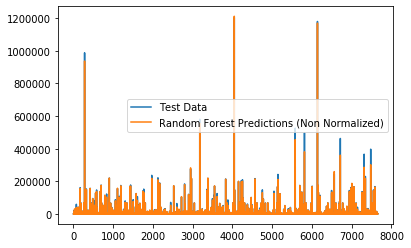

In [17]:
# rf_estimator_non_norm.fit(non_norm_in_conf_train, non_norm_out_conf_train)
rf_estimator_pred_non_norm = rf_estimator_non_norm.predict(non_norm_in_conf_test)
plt.plot(non_norm_out_conf_test)
plt.plot(rf_estimator_pred_non_norm)
plt.legend(['Test Data', 'Random Forest Predictions (Non Normalized)'])
print('MAE:', mean_absolute_error(non_norm_out_conf_test, rf_estimator_pred_non_norm))
print('MSE:',mean_squared_error(non_norm_out_conf_test, rf_estimator_pred_non_norm))

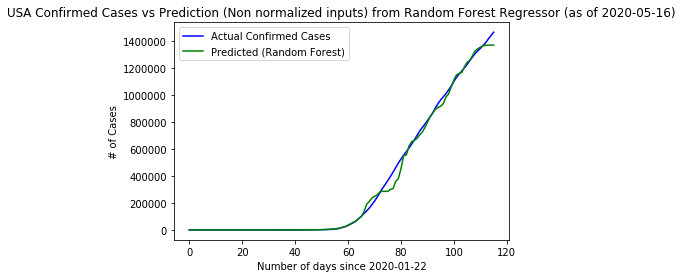

In [16]:
usa_df = df.loc[df["Country/Region"] == "US"]
usa_inputs_non_norm = usa_df[["Lat", "Long", "Num_days_from_begin"]].values
usa_pred_output_non_norm = rf_estimator_non_norm.predict(usa_inputs_non_norm)

plt.plot(days_list, usa_outputs, color='blue', label="Actual Confirmed Cases")
plt.plot(days_list, usa_pred_output_non_norm, color='green', label="Predicted (Random Forest)")
plt.xlabel("Number of days since {}".format(first_day))
plt.ylabel("# of Cases")
plt.title("USA Confirmed Cases vs Prediction (Non normalized inputs) from Random Forest Regressor (as of {})".format(last_day))
plt.legend()